# The exterior transport problem : a numerical tour

<img src="./pictures/gif_random_c_big.gif" style="width:30%;">

## Welcome to the numerical tour of the exterior transport problem!

The goal of this notebook is to provide numerical illustrations of the following problem:

\begin{equation}
\inf_E \left\{\mathcal{E}(E) = P(E)+ c \mathcal{W}_2^2(E) : |E| = \pi \right\},
\end{equation}

where $P$ denotes the perimeter, $\mathcal{W}_2$ the exterior transport functional and $|\cdot|$ the area. Simply put, we aim at  finding the set $E$ of the plane $\mathbb{R}^2$ which minimizes the energy $\mathcal{E}$ defined above. The parameter $c >0$ controls which term (P or $\mathcal{W}_2$) is dominant in $\mathcal{E}$.

Refer to the [related article](./documentation/article_numerical_experiments.pdf) where every definition is given and commented in great details.

# The exterior transport functional

The exterior transport functional $W_2^2$ is also defined through a minimisation problem. Given a set $E \subset \mathbb{R}^2$, we have

\begin{equation}
\mathcal{W}_2^2(E) = \inf_F \left\{W_2^2(E,F) : |F \cap E| = 0, \, |E|=|F| \right\}
\end{equation}

where $W_2^2(E,F)$ denotes the $2$-Wasserstein distance between the measures $E dx$ and $F dx$. Consequently, to compute $W_2^2(E)$ we look for a set $F$ outside of $E$ that is a close as possible to E in terms of Wasserstein distance, i.e. in terms of manually moving mass from $E$ to $F$.

## Exterior transport of pacman

<img src="./pictures/example_pacman.png" 
     alt="A set (in blue) and its minimiser for the exterior transport (in red)." 
     style="width:30%;">

<div style="text-align: center;"> 
    <i> A set (in blue) and its minimiser for the exterior transport (in red). </i> </div>


# A perturbed isoperimetric problem

Let us now focus on the main question, that is the minimization of $P + c \mathcal{W}_2^2$. The case where $c=0$ is well-known: it corresponds to the classical isoperimetric problem, which is solved by the ball.

When $c$ is non zero but still small, can our problem be considered a perturbation of the classical isoperimetric problem? We positively answered this question in Theorem 1.3 of the article ["An Exterior Transport Problem"](https://arxiv.org/pdf/2309.02806) published in 2021. 

Let us give a numerical illustration of this result. We approximate minimizers of our problem by gradient descent. We start with a shape ressembling the ball, and observe whether it evolves into the ball as time passes. If it does so, then we have further evidence that the ball is, at least locally, a minimizer of $P + c\mathcal{W}_2^2$ when $c$ is small.

# Case 1: the ball is a minimizer for small c

Below is the main module of the python code. It mostly calls functions from the functions.py module, and allows to chose parameters. Again, see the [related article](./documentation/article_numerical_experiments.pdf) for the definitions of the parameters. In this first case, the relevant ones are the 'shape' one (the initial shape is an annulus) and $c$, which is $1$ in this first experiment. 

#### If you want to run the code yourself instead of just loading the figure, you can uncomment the last five lines.

i= 200  E= 7.345477738694216
i= 400  E= 7.345464061188842
i= 600  E= 7.345462169495832
i= 800  E= 7.345461754000309
i= 1000  prev_E =  0  E= 7.345461647332781
Time elapsed  293.865984916687


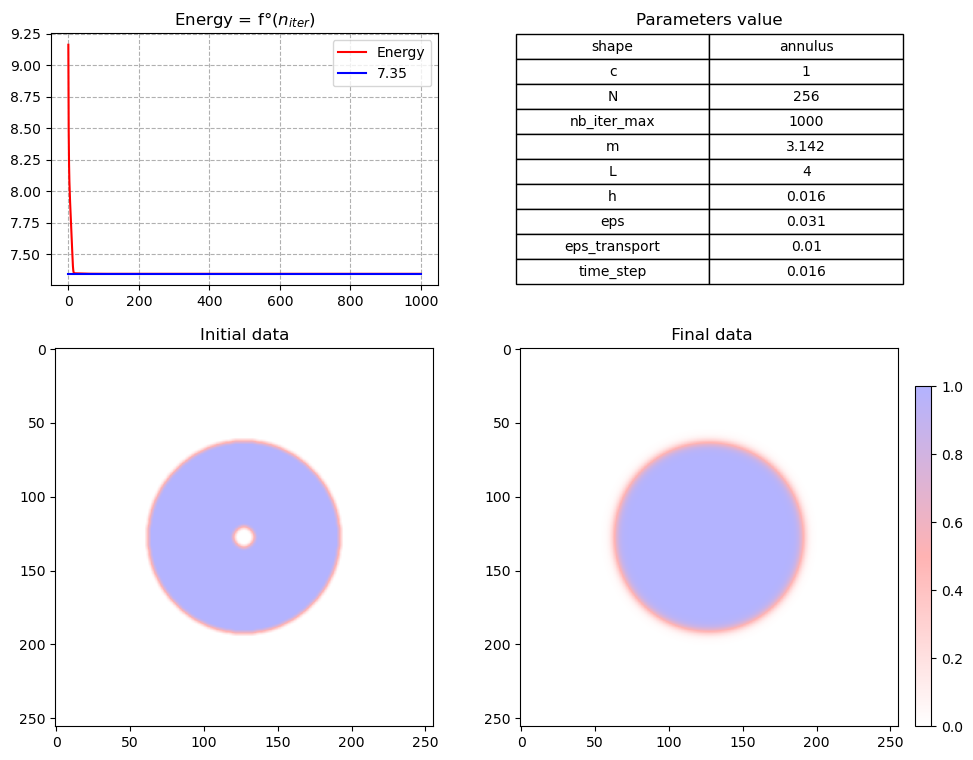

In [1]:
### third party libraries
import numpy as np
import matplotlib.colors as mcolors

### custom functions
from functions import display_timelapse, launch_simulation, make_gif
from functions import display_figure

### grid and algorithm parameters
m = np.pi
N = 256
L = 4
h = L/N
eps = 2*h
eps_transport = 1e-2
time_step = eps/2
nb_iter = 1000
c = 1

### shape parameters
shape = 'annulus'
extra = {'rmin':0.1}

### colormap parameters

colors = ['#ffffff', '#ffb3b3', '#b3b3ff']
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors)

### main of main
U_0, U_1, list_of_E, dic_param, list_of_U = launch_simulation(m, N, L, h, eps, 
                        eps_transport, time_step, nb_iter, c, 
                        shape=shape, extra=extra, timelapse=True)

fig = display_figure(U_0, U_1, list_of_E, dic_param, cmap)

<img src="./pictures/close_ball_c_small.png" style="width:100%;">
<div style="text-align: center; font-size: 20px;"> 
    <i> A first experiment. </i> </div>

## Some comments

On the above picture, we can see that the initial data rapidly converges to a blurred ball. The final energy is approximately 7.35, which corresponds to the theoretical energy of the unit ball:

\begin{equation}
\mathcal{E}(B_1) = P(B_1) + W_2^2(B_1) = 2 \pi + \mathcal{W}_2^2(B_1) \sim 6.28 + 1.05 = 7.35
\end{equation}

The value $c= 1$ was not chosen at random. Through additional experiments, we discovered that there exists a critical value $c_0 \sim 5.54$ above which the ball is not the local minimizer of $P + c \mathcal{W}_2^2$ anymore. The value of $c_0$ we obtained experimentally is coherent with the one (denoted by $\lambda_1$) obtained in the related article in the case of radially symmetric minimizers.

Let us illustrate this fact with another simulation. We keep the same parameters as in the first experiment except for $c$, which is now 10.

In [ ]:
c = 10
U_0, U_1, list_of_E, dic_param, list_of_U = launch_simulation(m, N, L, h, eps, 
                        eps_transport, time_step, nb_iter, c, 
                        shape=shape, extra=extra, timelapse=True)

fig = display_figure(U_0, U_1, list_of_E, dic_param, cmap)

i= 200  E= 14.124682058063284
i= 400  E= 13.911746502075069
i= 600  E= 13.86336515823061


<img src="./pictures/close_ball_c_big.png" style="width:100%;">

<div style="text-align: center; font-size: 20px;"> 
    <i> When the perimeter is not dominant anymore. </i> </div>

In this case, the final shape is an annulus. Theoretical computations confirm that when c is large, the annulus has an energy lower than the one of the ball.